# Chapter 2: Exploratory and Descriptive Methods
Before beginning any sort of statistical analysis, it is imperative to take a preliminary
look at the data with three main goals in mind:
* <font color=red> check for errors and anomalies</font> Errors should, of course, be corrected, since even a small percentage of erroneous data values can drastically influence the results.
* <font color=red>understand the distribution of each of the variables on its own.</font> Understanding the distribution of the variables, especially the outcomes, is crucial to choosing the appropriate multipredictor regression method.
* <font color=red>begin to understand the nature and strength of relationships among variables.</font> Finally, understanding the nature and strength of relationships is the first step in building a more formal statistical model from which to draw conclusions.

## 2.1 Data Checking
Procedures for data checking should be implemented before data entry begins, to
head off future headaches. Many data entry programs have the capability to screen
for egregious errors, including values that are out the expected range or of the
wrong “type.” If this is not possible, then we recommend regular checking for data
problems as the database is constructed.
Here are two examples we have encountered recently.
##### Example 1. 
some values of a
variable defined as a proportion were inadvertently entered as percentages (i.e., 100
times larger than they should have been). Although they made up less than 3% of the
values, the analysis was completely invalidated. Fortunately, this simple error was
easily corrected once discovered.
##### Example 2.
A second example involved patients with a heart
anomaly. Those whose diagnostic score was poor enough (i.e., exceeded a numerical
threshold) were to be classified according to the type of anomaly. Data checks
revealed missing classifications for patients whose diagnostic score exceeded the threshold, as well as classifications for patients whose score did not, complicating
planned analyses. Had the data been screened as they were collected, this problem
with study procedures could have been avoided.

## 2.2 Types of Data
The proper description of data depends on the nature of the measurement. The key
distinction for statistical analysis is between numerical and categorical variables.The number of diagnostic tests ordered is a numerical variable, while the gender
of a person is categorical.

A secondary but sometimes important distinction within numerical variables is
whether the variable can take on a whole continuum or just a discrete set of values.

<font color=DodgerBlue> Definition: A numerical variable taking on a continuum of values is called continuous and
one that only takes on a discrete set of values is called discrete.</font>

A secondary distinction sometimes made with regard to categorical variables
is whether the categories are ordered or unordered.

<font color=DodgerBlue> Definition: A categorical variable is ordinal if the categories can be logically ordered from
smallest to largest in a sense meaningful for the question at hand (we need to rule out silly
orders like alphabetical); otherwise it is unordered or nominal.</font>

This is the outline of the rest of this chapter.     

## 2.3 One-Variable Descriptions
We begin by describing techniques useful for examining a single variable at a time.
These are useful for uncovering mistakes or extreme values in the data and for
assessing distributional shape.
### 2.3.1. Numerical Variables
We can describe the distribution of numerical variables using either numerical or
graphical techniques.
##### Example Systolic Blood Pressure
The western collaborative group study (WCGS) was a large epidemiological study
designed to investigate the association between the “type A” behavior pattern and
coronary heart disease (CHD) (Rosenman et al. 1964). We will revisit this study
later in the book, focusing on the primary outcome, but for now we want to explore
the distribution of SBP.

In [1]:
import numpy as np 
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Load the data `wcgs`

In [3]:
wcgs=pd.read_stata('./Data/Chapter2/wcgs.dta', index_col='id')
wcgs.head(5)

,age,arcus,behpat,bmi,chd69,chol,dbp,dibpat,height,lnsbp,...,ncigs,sbp,smoke,t1,time169,typchd69,uni,weight,wghtcat,agec
id,,,,,,,,,,,,,,,,,,,,,
2343,50,1.0,A1,31.321007,No,249.0,90,Type A,67,4.882802,...,25,132,Yes,-1.633353,1367,0,0.486074,200,170-200,46-50
3656,51,0.0,A1,25.328579,No,194.0,74,Type A,73,4.787492,...,25,120,Yes,-4.063366,2991,0,0.185954,192,170-200,51-55
3526,59,1.0,A1,28.693878,No,258.0,94,Type A,70,5.062595,...,0,158,No,0.639729,2960,0,0.727799,200,170-200,56-60
22057,51,1.0,A1,22.148708,No,173.0,80,Type A,69,4.836282,...,0,126,No,1.121768,3069,0,0.624464,150,140-170,51-55
12927,44,0.0,A1,22.313034,No,214.0,80,Type A,71,4.836282,...,0,126,No,2.425011,3081,0,0.378978,160,140-170,41-45


In [4]:
wcgs.isna().sum()

age          0
arcus        2
behpat       0
bmi          0
chd69        0
chol        12
dbp          0
dibpat       0
height       0
lnsbp        0
lnwght       0
ncigs        0
sbp          0
smoke        0
t1          39
time169      0
typchd69     0
uni          0
weight       0
wghtcat      0
agec         0
dtype: int64

#### Numerical Description
As a first step, we obtain basic descriptive statistics for SBP.
Several features of the output are
worth consideration. 
* The largest and smallest values should be scanned for outlying or incorrect values.
* The mean (or median) and standard deviation should be assessed as general measures of the location and spread of the data.

In [5]:
wcgs.sbp.describe()

count    3154.000000
mean      128.632847
std        15.117731
min        98.000000
25%       120.000000
50%       126.000000
75%       136.000000
max       230.000000
Name: sbp, dtype: float64

* Secondary features are the skewness and kurtosis, though these are usually more easily assessed by the graphical means described in the next section. 
* Another assessment of skewness is a large difference between the mean and median.

In right-skewed data,the mean is quite a bit larger than the median, while in left-skewed data, the mean is much smaller than the median.

In [6]:
sp.stats.skew(wcgs['sbp'])

1.204396660550696

In [7]:
sp.stats.kurtosis(wcgs['sbp'])

2.7924647337066197

In [8]:
np.median(wcgs['sbp'])

126.0

#### Graphical Description
Graphs are often the quickest and most effective way to get a sense of the data.

For numerical data, three basic graphs are most useful: the histogram, boxplot,
and normal quantile–quantile (or Q–Q) plot. Each is useful for different purposes.
* The histogram easily conveys information about the location, spread, and shape of the frequency distribution of the data.
* The boxplot is a schematic identifying key features of the distribution.
* the normal Q–Q plot facilitates comparison of the shape of the distribution of the data to a normal (or bell-shaped) distribution.

##### Histogram
The histogram displays the frequency of data points falling into various ranges as
a bar chart. Figure 2.1 shows a histogram of the SBP data from WCGS. In this figure, we can see that
most of the measurements are in the range of about 100 to 150, with a few extreme
values around 200. The percentage of observations in the first interval is about
47.4%.

However, this is not a particularly well-constructed histogram. With over 3,000
data points, we can use more intervals to increase the definition of the histogram and
avoid grouping the data so coarsely. Using only five intervals, the first two including
almost all the data, makes for a loss of information, since we only know the value of
the data in those large “bins” to the limits of the interval (in the case of the first bin,
between 98 and 125), and learn nothing about how the data are distributed within
those intervals. Also, our preference is to provide more interpretable axis labeling.

Figure 2.2 shows a modified histogram generated using the current version of Python `hist()`
that provides much better definition as to the shape of the frequency distribution
of SBP.

Text(0.5, 1.0, 'Fig.2.2 Histogram of the systolic blood pressure data using 15 intervals')

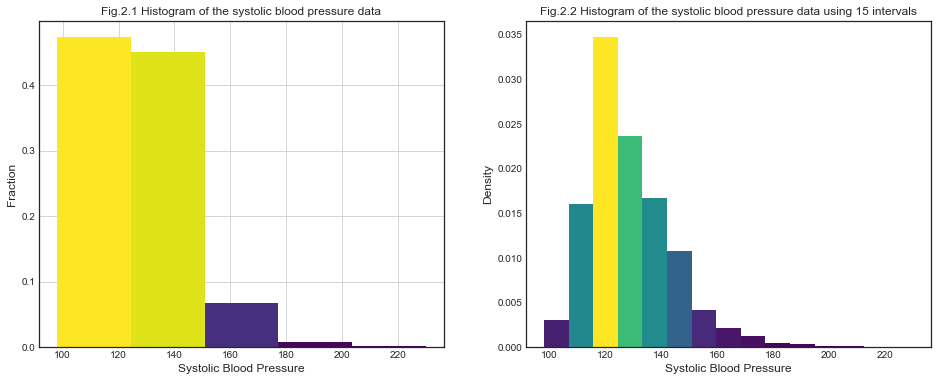

In [9]:
fig, (ax1,ax2)=plt.subplots(ncols=2, sharex=False, sharey=False)
fig.set_figheight(6)
fig.set_figwidth(16)

#First histogram plot
# N is the count in each bin
N, bins, patches =ax1.hist(wcgs['sbp'], weights=np.zeros_like(wcgs['sbp'])+1./ wcgs['sbp'].size,
                          bins=5, range=(98,230))
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
ax1.set_xlabel('Systolic Blood Pressure', fontsize=12)
ax1.set_ylabel('Fraction', fontsize=12)
ax1.set_title('Fig.2.1 Histogram of the systolic blood pressure data')
ax1.grid(True)

#Second histogram plot
N, bins, patches =ax2.hist(wcgs['sbp'], density=True, bins=15)
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
ax2.set_xlabel('Systolic Blood Pressure', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Fig.2.2 Histogram of the systolic blood pressure data using 15 intervals')

The key with a histogram is to use a sufficient number of intervals to define the
shape of the distribution clearly and not lose much information, without using so
many as to leave gaps, give the histogram a ragged shape, and defeat the goal of
summarization. With 3,000 data points, we can afford quite a few bins. 

<font color=red> A rough rule of thumb is to choose the number of bins to be about $1+3.3 log_{10}(n)$,</font> where n is the sample size. Figure 2.2 uses 15 bins and provides a
clear definition of the shape as well as a fair bit of detail.

##### Boxplot
The boxplot in Fig. 2.3 graphically displays information from the summary
in Table 2.1, specifically the minimum, maximum, and 25th, 50th (median), and
75th percentiles. This retains many of the advantages of a graphical display while
still providing fairly precise numerical summaries. The “box” displays the 25th and
75th percentiles (the lower and upper edges of the box) and the median (the line
across the middle of the box).

Text(0, 0.5, 'Systolic Blood Pressure')

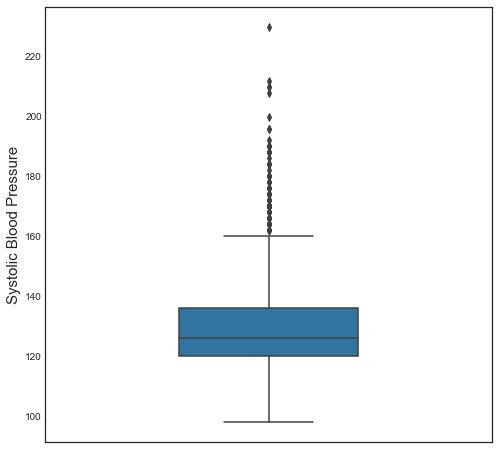

In [10]:
fig, ax=plt.subplots(figsize=(8,8))
ax=sns.boxplot(x=wcgs['sbp'], orient='v',width=0.4)
ax.set_ylabel('Systolic Blood Pressure', fontsize=15)

Boxplots convey a wealth of information about the distribution of the variable:

* Location, as measured by the median
* Spread, as measured by the height of the box (this is called the interquartile range or IQR)
* Range of the observations
* Presence of outliers
* Some information about shape

This last point bears further explanation. 

If the median is located toward the
bottom of the box, then the data are right-skewed toward larger values.<font color=red> In right-skewed data,the mean is quite a bit larger than the median.</font> That is, distance between the median and the 75th percentile is greater than that between
the median and the 25th percentile. Likewise, right-skewness will be indicated if the
upper whisker is longer than the lower whisker or if there are more outliers in the
upper range. Both the boxplot and the histogram show evidence for right-skewness
in the SBP data.

If the direction of the inequality is reversed (more outliers on
the lower end, longer lower whisker, median toward the top of the box), then the
distribution is left-skewed.<font color=red> in left-skewed data, the mean is much smaller than the median.</font>
##### Q-Q plot

Our final graphical technique, the normal Q–Q plot, is useful for comparing
the frequency distribution of the data to a normal distribution. Since it is easy to
distinguish lines that are straight from ones that are not, a normal Q–Q plot is
constructed so that the data points fall along an approximately straight line when
the data are from a normal distribution, and deviate systematically from a straight
line when the data are from other distributions.

Figure 2.4 shows the Q–Q plot for
the SBP data. The line of the data points shows a distinct curvature, indicating the
data are from a nonnormal distribution. Upward curvature, as in Fig. 2.4, is indicative of right-skewness,
while downward curvature is indicative of left-skewness.

Text(0.5, 1.0, 'Fig.2.4 Normal Q–Q plot of the systolic blood pressure data')

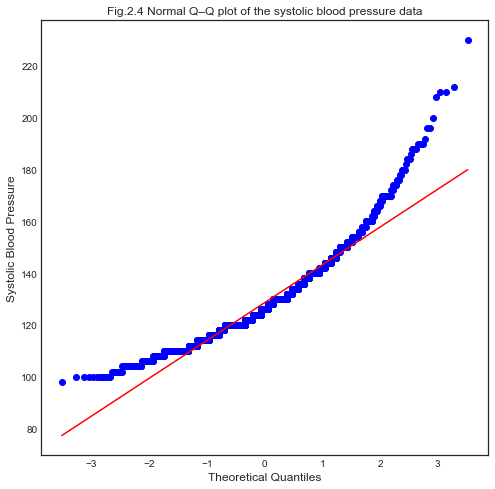

In [11]:
fig, ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)

sp.stats.probplot(wcgs['sbp'], plot=ax)
ax.set_xlabel('Theoretical Quantiles', fontsize=12)
ax.set_ylabel('Systolic Blood Pressure', fontsize=12)
ax.set_title('Fig.2.4 Normal Q–Q plot of the systolic blood pressure data', fontsize=12)

The other two common
patterns are S-shaped. An S-shape as in Fig. 2.5 indicates a heavy-tailed distribution,
while an S-shape like that in Fig. 2.6 is indicative of a light-tailed distribution. 

Heavy- and light-tailed are always in reference to a hypothetical normal distribution
with the same spread. A heavy-tailed distribution has more observations in the middle of the distribution and way out in the tails, and fewer a modest way
from the middle (simply having more in the tails would just mean a larger spread).
Light-tailed means the reverse: fewer in the middle and far out tails and more in
the mid-range. Heavy-tailed distributions are generally more worrisome than lighttailed
since they are more likely to include outliers.

Text(0.5, 1.0, 'Fig.2.5 Normal Q–Q plot of data from a heavy-tailed distribution')

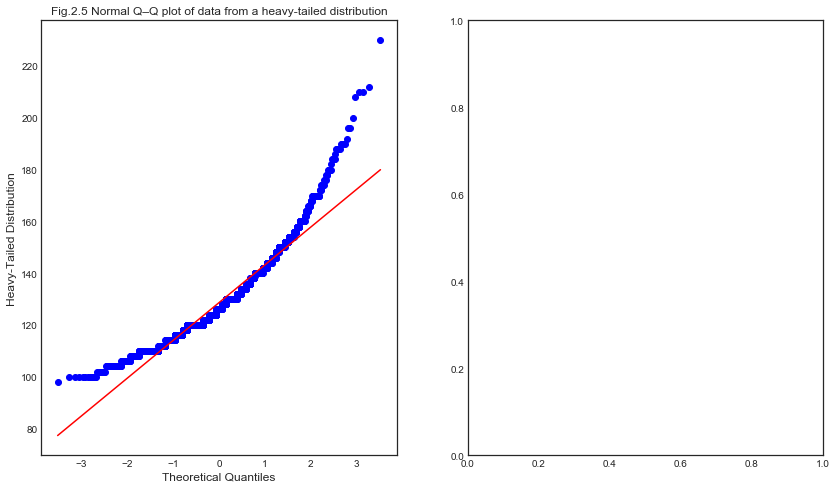

In [12]:
fig, (ax1, ax2)=plt.subplots(ncols=2, sharex=False, sharey=False)
fig.set_figheight(8)
fig.set_figwidth(14)

sp.stats.probplot(wcgs['sbp'], plot=ax1)
ax1.set_xlabel('Theoretical Quantiles', fontsize=12)
ax1.set_ylabel('Heavy-Tailed Distribution', fontsize=12)
ax1.set_title('Fig.2.5 Normal Q–Q plot of data from a heavy-tailed distribution', fontsize=12)

#### Transformations of Data

A number of the techniques we describe in this book require the assumption of
approximate normality or, at least, work better when the data are not highly skewed
or heavy-tailed, and do not include extreme outliers. <font color=red>A common method for dealing
with these problems is to transform such variables.</font> For example, instead of the
measured values of SBP, we might instead use the logarithm of SBP. We first
consider why this works and then some of the advantages and disadvantages of
transformations.

Transformations affect the distribution of values of a variable because they emphasize
differences in a certain range of the data, while de-emphasizing differences
in others.

Consider a table of transformed values, as displayed in Table 2.2. On the
original scale the difference between 0.01 and 0.1 is 0.09, but on the log10 scale,
the difference is 1. In contrast, the difference between 100 and 1,000 on the original
scale is 900, but this difference is also 1 on the $\log_{10}$ scale. So a log transformation
de-emphasizes differences at the upper end of the scale and emphasizes those at the
lower end. This holds for the natural log as well as $\log_{10}$ transformation. The effect
can readily be seen in Fig. 2.7, which displays histograms of SBP on the original
scale and after natural log transformation.

Text(0, 0.5, 'Density')

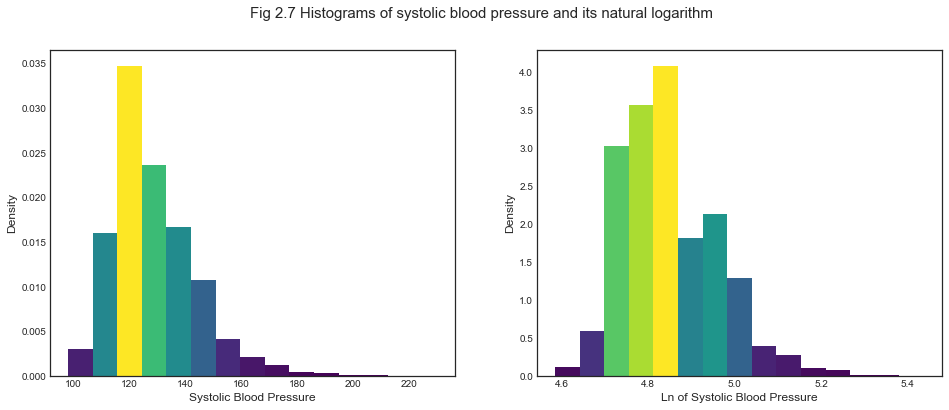

In [13]:
fig, (ax1,ax2)=plt.subplots(ncols=2, sharex=False, sharey=False)
fig.set_figheight(6)
fig.set_figwidth(16)
fig.suptitle('Fig 2.7 Histograms of systolic blood pressure and its natural logarithm', fontsize=15)

#first histogram plot
N, bins, patches =ax1.hist(wcgs['sbp'], density=True, bins=15)
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
ax1.set_xlabel('Systolic Blood Pressure', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)


#second histogram plot
N, bins, patches =ax2.hist(np.log(wcgs['sbp']), density=True, bins=15)
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax2.set_xlabel('Ln of Systolic Blood Pressure', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)

The log-transformed data is distinctly less right-skewed, even though some
skewness is still evident. Essentially, we are viewing the data on a different scale
of measurement.

There are a couple of other reasons to consider transforming variables, as we will
see in later sections and chapters: transformations can simplify the relationships between variables (e.g., by making a curvilinear relationship linear), can remove
interactions, and can equalize variances across subgroups that previously had
unequal variances.

<font color=red>A primary objection to the use of transformations is that they make the data less
interpretable.</font> After all, who thinks about medical costs in log dollars? In situations
where there is good reason to stay with the original scale of measurement (e.g.,
dollars), we may prefer alternatives to transformation including <font color=red>GLMs and weighted
analyses. Or we may appeal to the robustness of normality-based techniques: many
perform extremely well even when used with data exhibiting fairly serious violations
of the assumptions.</font>

In other situations, with a bit of work, it is straightforward to express the results
on the original scale when the analysis has been conducted on a transformed scale.
For example, Sect. 4.7.5 gives the details for log transformations in linear regression.

A compromise when the goal is, for example, to test for differences between
two arms in a clinical trial is to plan ahead to present basic descriptive statistics
in the original scale, but perform tests on a transformed scale more appropriate for
statistical analysis. After all, a difference on the transformed scale is still a difference
between the two arms.

Finally, we remind the reader that different scales of measurement just take a bit
of getting used to: consider pH.

### 2.3.2 Categorical Variables

Categorical variables require a different approach, since they are less amenable to
graphical analyses and because common statistical summaries, such as mean and
standard deviation, are inapplicable. Instead we use tabular descriptions.

Table 2.3
gives the frequencies, percents, and cumulative percents for each of the behavior
pattern categories for the WCGS data. Note that cumulative percentages are really
only useful with ordinal categorical data (why?).

Text(0.5, 1.0, 'Frequence of behavior patterns')

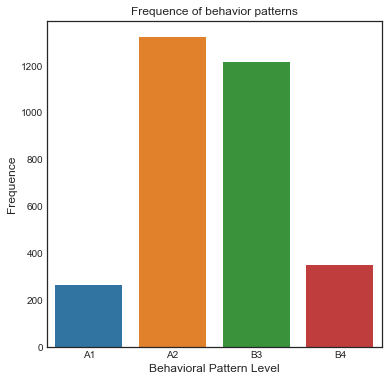

In [14]:
fig, ax=plt.subplots(figsize=(6,6))
ax=sns.countplot(wcgs['behpat'], label='Freq')
ax.set_xlabel('Behavioral Pattern Level', fontsize=12)
ax.set_ylabel('Frequence', fontsize=12)
ax.set_title('Frequence of behavior patterns', fontsize=12)

In [15]:
A2, B3, B4, A1=wcgs.behpat.value_counts()
Tot=wcgs.behpat.value_counts().sum()
P2,P3,P4,P1=round(wcgs.behpat.value_counts(normalize=True)*100,2)
Top=round(wcgs.behpat.value_counts(normalize=True).sum()*100,2)

In [16]:
Table23=pd.DataFrame({'Levels':['A1','A2','B3','B4','Total'], 'Freq':[A1,A2, B3, B4,Tot],
                      'Percent':[P1,P2,P3,P4, Top]},
                     columns=['Levels','Freq','Percent'])
Table23.set_index('Levels')

,Freq,Percent
Levels,,
A1,264,8.37
A2,1325,42.01
B3,1216,38.55
B4,349,11.07
Total,3154,100.00


When tables are generated by the computer, there is usually little latitude in the
details. However, when tables are constructed by hand, thought should be given
to their layout; Ehrenberg (1981) is recommended reading. Three easy-to-follow suggestions from that article are to 
* arrange the categories in a meaningful way (e.g.,not alphabetically), 
* report numbers to two effective digits, 
* leave a gap every three or four rows to make it easier to read across the table

Table 2.4 illustrates these
concepts. With the table arranged in order of the rankings, it is easy to see values
that do not follow the pattern predicted by rank, for example, out-of-state tuition.


## 2.4 Two-Variable Descriptions

Most of the rest of this book is about the relationships among variables. An example
from the WCGS is whether behavior pattern is related to SBP. In investigating the
relationships between variables, it is often useful to distinguish the role that the
variables play in an analysis.

### 2.4.1 Outcome Versus Predictor Variables
A key distinction is whether a variable is being predicted by the remaining variables,
or whether it is being used to make the prediction.
* The variable singled out to be predicted from the remaining variables we will call the <font color=DodgerBlue>outcome variable</font>; alternate and interchangeable names are <font color=DodgerBlue>response  variable or dependent variable.</font>
* The variables used to make the prediction will be called <font color=DodgerBlue> predictor variables</font>. Alternate and equivalent terms are <font color=DodgerBlue> covariates and independent variables.</font>

We slightly
prefer the <font color=red>outcome/predictor combination</font>, since the term response conveys a cause and-
effect interpretation, which may be inappropriate, and dependent/independent
is confusing with regard to the notion of statistical independence. (“Independent
variables do not have to be independent” is a true statement!).

In the WCGS example, we might hypothesize that change in behavior pattern
(which is potentially modifiable) might cause change in SBP. This would lead us to
consider SBP as the outcome and behavior pattern as the predictor.

### 2.4.2 Continuous Outcome Variable
As before, it is useful to consider the nature of the outcome and predictor variables
in order to choose the appropriate descriptive technique.We begin with continuous
outcome variables, first with a continuous predictor and then with a categorical
predictor.

When both the predictor and outcome variables are continuous, the typical
numerical description is a correlation coefficient and its graphical counterpart is a
scatterplot. Again considering the WCGS study, we will investigate the relationship
between SBP and weight.
##### Table 2.5 Correlation coefficient for systolic blood pressure and weight.

In [18]:
corr=wcgs[['sbp','weight']].corr()
corr.style.background_gradient()

,sbp,weight
sbp,1,0.25325
weight,0.25325,1


Table 2.5 shows the Python command and output for the correlation coefficient,
while. Fig. 2.8 shows a scatterplot. Both the graph and the numerical summary
confirm the same thing: <font color=red>there is a weak association between the two variables,
as measured by the correlation of 0.25.</font> 

The graph conveys important additional
information. In particular, <font color=red>there are quite a few outliers, including an especially
anomalous data point with high blood pressure and the lowest weight in the dataset.</font>

Text(0.5, 1.0, 'Fig. 2.8 Scatterplot of systolic blood pressure versus weight')

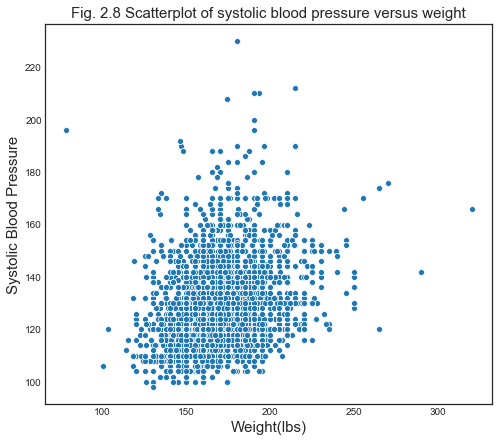

In [21]:
fig, ax=plt.subplots(figsize=(8,7))

ax=sns.scatterplot(x=wcgs.weight, y=wcgs.sbp, markers='o')
ax.set_xlabel('Weight(lbs)', fontsize=15)
ax.set_ylabel('Systolic Blood Pressure', fontsize=15)
ax.set_title('Fig. 2.8 Scatterplot of systolic blood pressure versus weight', fontsize=15)

The Pearson correlation coefficient r, more fully described in Sect. 3.2, is a scalefree
measure of association that does not depend on the units in which either SBP
or weight is measured. <font color=red>The correlation coefficient varies between –1 and 1, and
correlations of absolute value 0.7 or larger are considered strong associations in
many contexts.</font> In fields where data are typically noisy, including our SBP example,
much smaller correlations may be considered meaningful.

It is important to keep in mind that the Pearson correlation coefficient only
measures the strength of the linear relationship between two variables. To determine
whether the correlation coefficient is a reasonable numerical summary of the
association, a graphical tool that helps to assess linearity in the scatterplot is a
<font color=red>scatterplot smoother.</font>

Figure 2.9 shows a scatterplot smooth superimposed on the graph of SBP versus weight. <font color=red> Question: How to set this parameter in python?</font> The bw(0.25) option specifies that for estimation of the
height of the curve at each point, 25% of the data nearest that point should be used.
This is all just a fancy way of drawing a flexible curve through a cloud of points.

Figure 2.9 shows that the relationship between SBP and weight is very close to
linear. The small upward bend at the far left of the graph is mostly due to the outlying
observation at the lowest weight and is a warning as to the instability of LOWESS
(or any scatterplot smoother) at the edges of the data.

Text(0.5, 1.0, 'Fig. 2.9 LOWESS smooth of systolic blood pressure versus weight')

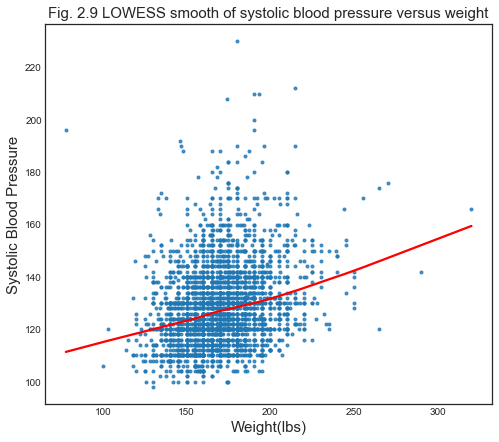

In [31]:
fig, ax=plt.subplots(figsize=(8,7))

ax=sns.regplot(x='weight', y='sbp',data=wcgs, lowess=True, 
               scatter_kws={'s':9},line_kws={'color':'r'}, marker='o', fit_reg=True)
ax.set_xlabel('Weight(lbs)', fontsize=15)
ax.set_ylabel('Systolic Blood Pressure', fontsize=15)
ax.set_title('Fig. 2.9 LOWESS smooth of systolic blood pressure versus weight', fontsize=15)

Choice of bandwidth is somewhat subjective. Small bandwidths like 0.05 often
give very bumpy curves, which are hard to interpret. At the other extreme,
bandwidths too close to one force the curve to be practically a straight line, obviating
the advantage of using a scatterplot smoother. See Problem 2.6.

#### Categorical Predictor

With a continuous outcome and a categorical predictor, the usual strategy is to apply
the same numerical or graphical methods used for one-variable descriptions of a
continuous outcome, but to do so separately within each category of the predictor.

##### Table 2.6 Summary data for systolic blood pressure by behavior pattern

In [36]:
wcgs['sbp'].groupby(wcgs['behpat']).describe()

,count,mean,std,min,25%,50%,75%,max
behpat,,,,,,,,
A1,264.0,129.246212,15.292210,100.0,120.0,126.0,138.5,200.0
A2,1325.0,129.889057,15.770845,100.0,120.0,128.0,138.0,212.0
B3,1216.0,127.555099,14.787947,98.0,118.0,124.0,136.0,230.0
B4,349.0,127.154728,13.101246,102.0,118.0,126.0,136.0,178.0


Table 2.6 shows the most direct way of doing this in Python Groupby. Side-by-side boxplots, as shown in Fig. 2.10, are an excellent graphical tool for
examining the distribution of SBP in each of the behavior pattern categories and making comparisons among them. The four boxplots are quite similar. They each
have about the same median, interquartile range, and a slight right-skewness. At
least on the basis of this figure, there appears to be little relationship between SBP
and behavior pattern.

Text(0.5, 1.0, 'Fig. 2.10 Boxplots of systolic blood pressure by behavior pattern')

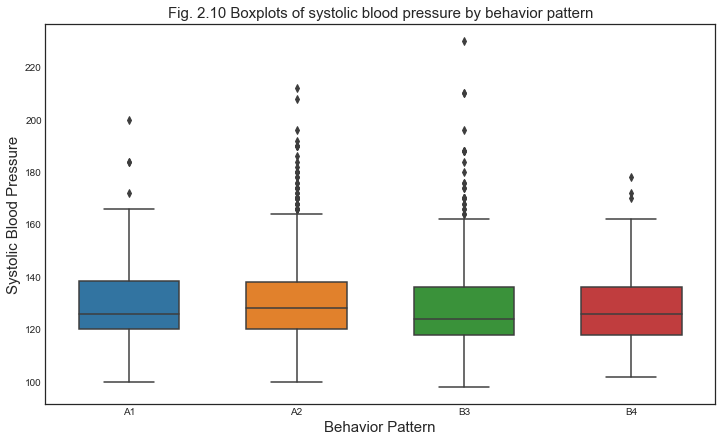

In [44]:
fig,ax=plt.subplots(figsize=(12,7))

ax=sns.boxplot(x=wcgs['behpat'], y=wcgs['sbp'], data=wcgs, width=0.6)
ax.set_xlabel('Behavior Pattern', fontsize=15)
ax.set_ylabel('Systolic Blood Pressure', fontsize=15)
ax.set_title('Fig. 2.10 Boxplots of systolic blood pressure by behavior pattern', fontsize=15)

### 2.4.3 Categorical Outcome Variable
With a categorical outcome variable, the typical method is to tabulate the outcome
within levels of the predictor variable. To do so first requires breaking any
continuous predictors into categories. Suppose, for example, we wished to treat
behavior pattern as the outcome variable and weight as the predictor.We might first
divide weight into four categories: $\leq 140$ pounds, $>140–170$,$>170–200$, and $>200$.
As with histograms, we need enough categories to avoid loss of information,without


### 2.4.3 Categorical Outcome Variable
## 2.5 Multivariable Descriptions
